Import Relevant Libraries

#Title: Predictive Property Valuation: Utilizing Machine Learning for House Price Determination
by Vismay Igur, Rishabh Chheda, Chirag Jain




A: Project idea - 5%
B: Dataset Curation and Preprocessing - 10%
C: Data Exploration and Summary Statistics - 10%
D: ML Algorithm Design/Development - 25%
E: ML Algorithm Training and Test Data Analysis - 20%
F: Visualization, Result Analysis, Conclusion - 15%
G: Final Tutorial Report Creation - 10%
H: Additional (not listed above, if any) - 5%
For example:

Member 1: Vismay Igur, Contribution: 85% (did not contribute to B or H).

Member 2: Chirag Jain, Contribution: 90% (did not contribute to G).

Member 3: Rishabh Chheda, Contribution: 80% (did not contribute to E).

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

Vismay Igur - 5/7/24

Chirag Jain - 5/7/24

Rishabh Chheda - 5/7/24


Vismay worked on finding a dataset that was relevant and easy to work with. He also helped train the ML model that was used to predict sale prices based on the important features. He came up with the idea of using an ANOVA test to see if there was any statistical difference between the prices of old, medium, and new aged homes. He also gave pointers on what to include in the final conclusion and created the final tutorial report on Github.


Chirag worked on a lot of the ML work, including designing/deciding what algorithms we would be using throughout the project, how much we should train the model to prevent overfitting, and running testing. He also wrote up brief conclusions for each of the sections. He also wrote the introduction.


Rishabh worked on preprocessing the data and making sure the data was suitable for us to work with, by removing extraneous features, any NaN values, and renaming columns to ones that made sense to us. He also found summary statistics on the initial data and explored the data further.


# Introduction:
When we first learned about regression models in Lecture and their applications for predicting values based on past observations. What was more fascinating was how the regression models could take in various features, account for each feature and its weights and then make a prediction. For our final project, we decided to build a ML model that could predict housing prices primarily because we noticed that there was an inflation in real estate prices, especially after Covid-19. Thus, we hoped to create a model that could accurately predict house sale prices for California - a state popular for its recent surge in housing prices.
Furthermore, one thing we noticed was that there are various factors that might affect the Sale Price of a house. Consequently, our analysis also focuses on shedding light on the main factors that might influence a house's price. We do this by utilizing various Statistical techniques. Doing so is important because it will not only allow the ML model to be more accurate and place more weight on those features, but it is also important because people who do not have access to a ML model can focus on these factors when trying to estimate the price of the house. Secondly, this project also aims to realize the most efficient model for such data. Since various regression models exist, it is important to comprehend the best suited model for such data. This conclusion will make it easier to pick a model for similar datasets in the future.

# Data Curation:
The dataset we chose is a collection of comprehensive housing data specifically from the state of California. It includes a lot of different features about various homes in the state, including house age, a conditions assessment, an analysis of the square footage and number of bedrooms/bathrooms, as well as structural information, namely what materials the houses are made of. Our main goal in using this dataset is to figure out which features are the most important in regards to predicting sale prices, and use machine learning techniques on those features to actually predict home prices. The end goal is to essentially validate real estate evaluations. There are hundreds of datasets that we could've used, but this one suited our needs best. This specifc dataset was downloaded from Kaggle.

In [ ]:
import pandas as pd
import numpy as nps
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


Read the Data from the CSV file

In [ ]:
df = pd.read_csv("train_Data.csv")
print(df["YearBuilt"])
print(df["OverallQual"].max())

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64
10


# Exploratory Data Analysis

In this section

Data Preprocessing (Dealing with NaN values, converting strings to ints, etc)

Let's see how the data is for the SalePrice of the houses. As we can see after plotting, the count is skewed to the left and we will normalize this by applying a log to all the values of SalePrice, so that it represents a normal distribution.

<Axes: xlabel='SalePrice', ylabel='Count'>

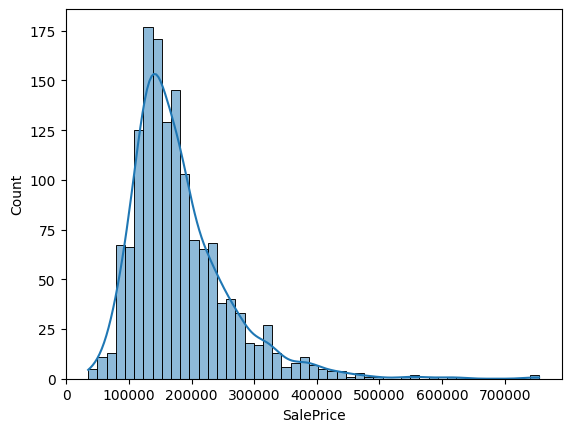

In [ ]:
sns.histplot(df['SalePrice'],kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

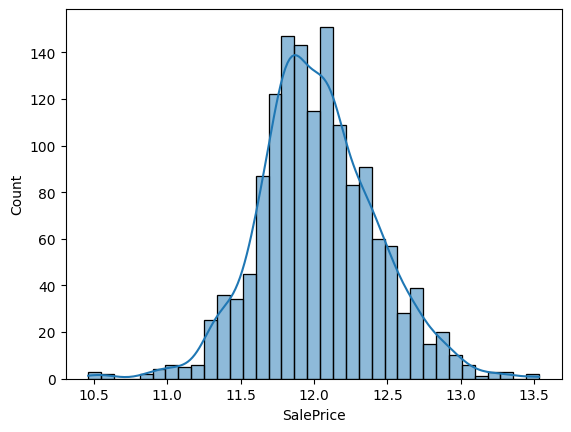

In [ ]:
#This code normalizes the above graph
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'],kde=True)

Next, let's checkout the number of Null values in the given dataset and try to identify features that might be irrelevant based on the number of NULL values.

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))

             Total    Percent
PoolQC        1453  99.520548
MiscFeature   1406  96.301370
Alley         1369  93.767123
Fence         1179  80.753425
MasVnrType     872  59.726027
FireplaceQu    690  47.260274
LotFrontage    259  17.739726
GarageYrBlt     81   5.547945
GarageCond      81   5.547945
GarageType      81   5.547945


This already gives us an idea of features that might have less effect on the sale price, so we will remove the columns which have high Null values.

In [ ]:
#Removing features that have high Null-Values
df.drop((missing_data[missing_data['Total'] > 6]).index, axis=1, inplace=True)


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total.head()

Electrical      1
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
dtype: int64

There is only one feature that has Null values, we will fix that in the next step

In [ ]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


Now, let's convert the skewed columns and normalize them since we have normalized the sale price too. This ensures that all the data that we are working with is normalized.

In [ ]:
from scipy.stats import skew

int_features = df.select_dtypes(include=['int64', 'float64'])
skewness = int_features.apply(skew)
skew_features = skewness[abs(skewness) > 0.5].sort_values(ascending=False)

print(skew_features)


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
YearRemodAdd     -0.503044
YearBuilt        -0.612831
dtype: float64


Let's normalize them now:

In [ ]:
df[skew_features.index] = df[skew_features.index].apply(lambda x: np.log1p(x))

Convert categorical data into integers using the label_encoder method. Although get_dummies can be used too, we will use the other method.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


object_columns = df.select_dtypes(include=['object'])
label_encoded_df = df

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in object_columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])



In [ ]:
label_encoded_df


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,3,9.042040,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.000000,2,2008,8,4,12.247699
1,2,3.044522,3,9.169623,1,3,3,0,2,0,...,0.000000,0.0,0.0,0.0,0.000000,5,2007,8,4,12.109016
2,3,4.110874,3,9.328212,1,0,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.000000,9,2008,8,4,12.317171
3,4,4.262680,3,9.164401,1,0,3,0,0,0,...,5.609472,0.0,0.0,0.0,0.000000,2,2006,8,0,11.849405
4,5,4.110874,3,9.565284,1,0,3,0,2,0,...,0.000000,0.0,0.0,0.0,0.000000,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,3,8.976894,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.000000,8,2007,8,4,12.072547
1456,1457,3.044522,3,9.486152,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,0.000000,2,2010,8,4,12.254868
1457,1458,4.262680,3,9.109746,1,3,3,0,4,0,...,0.000000,0.0,0.0,0.0,7.824446,5,2010,8,4,12.493133
1458,1459,3.044522,3,9.181735,1,3,3,0,4,0,...,4.727388,0.0,0.0,0.0,0.000000,4,2010,8,4,11.864469


Now that we have converted the Strings to Integers, the next step would be to see how each of the features relate to the SalePrice (since this is what we are ultimately trying to predict.)

In [ ]:
correlation_matrix = label_encoded_df.corr()

correlation_with_target = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)

print(correlation_with_target.head(10))


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.730254
GarageCars      0.680625
GarageArea      0.650888
1stFlrSF        0.608955
FullBath        0.594771
YearBuilt       0.584443
ExterQual       0.582164
YearRemodAdd    0.565590
Name: SalePrice, dtype: float64


Now, lets see a graph of the most influential features of the dataset

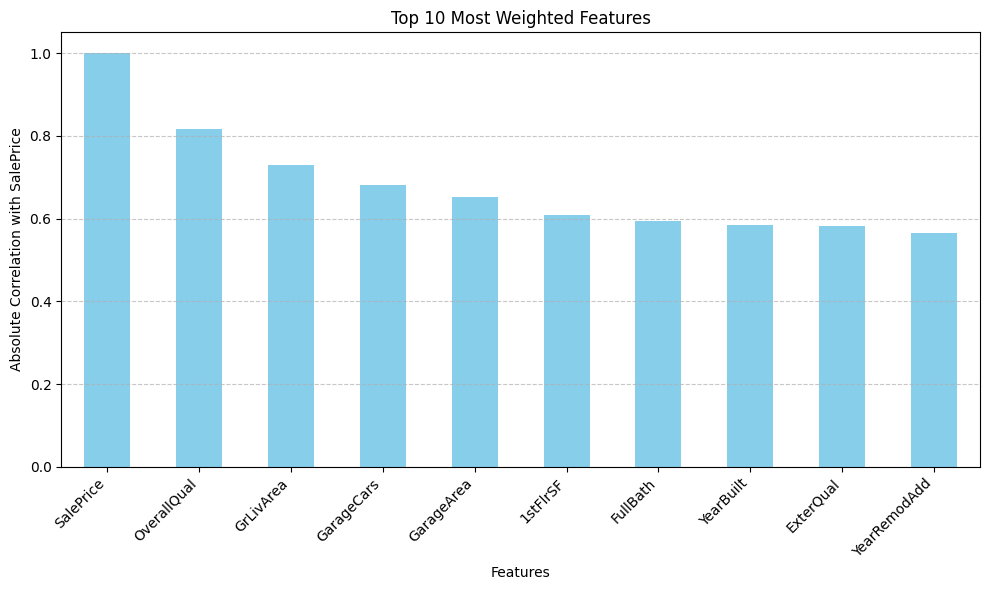

In [ ]:
top_10_features = correlation_with_target.head(10)

plt.figure(figsize=(10, 6))
top_10_features.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with SalePrice')
plt.title('Top 10 Most Weighted Features')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As demonstrated by the graph above, we can conclude that some of the most important features that determine SalePrice are OverallQual, GrLivArea, GarageArea, GarageCars, GarageArea, 1stFlrSF, FullBath, YearBuilt, ExterQual, YearRemondAdd.


Next, we need to determine if some of these features are correlated with each other. This will allow us to reduce the dimensionality of the model by eliminating features that are redundant.
We create a correlation matrix to do so.

Now, lets see if any of the features are correlated to each other.

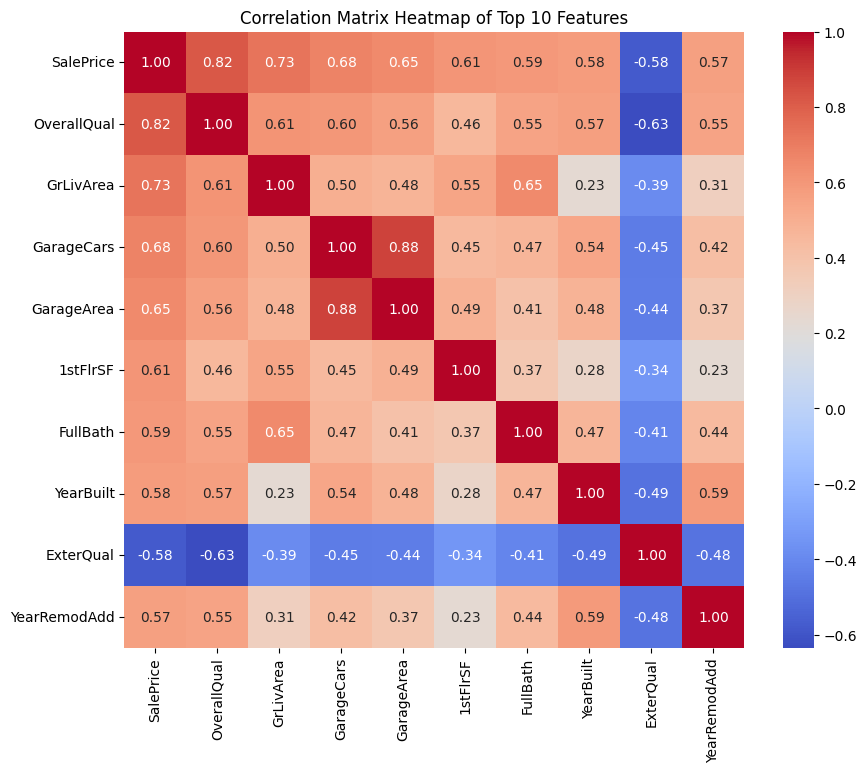

In [ ]:
import seaborn as sns

top_10_feature_names = top_10_features.index.tolist()

top_10_corr_matrix = label_encoded_df[top_10_feature_names].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Top 10 Features')
plt.show()


This Correlation matrix communicates that the most important features that affect the sales price are the OverallQual, GrLiveArea, GarageCar, ExterQual, GarageArea, BsmtQual, TotalBsmtSft. Some of the features might be over-represented because GarageCars and GarageArea are related- similar to GarageCars and GarageArea. Ultimately, these are the features that we will focus on.
Features: [OverallQual, GrLivArea, GarageArea, TotalBsmtSF, KitchenQual]

Let use perfrom a z-test to see how the GarageArea and GarageCars are correalted using the z-test

To begin with, GarageArea has a critical impact on the potential customers because it is an important factor when considering, so we will see the impact of LotArea of the house on the GarageCars. To do this we will be using the Z-test with a sample size of GarageArea in addition to the R^2 value we did earlier

In [ ]:
import statsmodels.api as sm

X = df['GarageArea']  # Independent variable
y = df['GarageCars']  # Dependent variable

# Add constant to independent variable for the intercept term
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

print("\nP-values:")
print(model.pvalues)

                            OLS Regression Results                            
Dep. Variable:             GarageCars   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     5132.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:55:41   Log-Likelihood:                -544.68
No. Observations:                1460   AIC:                             1093.
Df Residuals:                    1458   BIC:                             1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3082      0.022     13.791      0.0

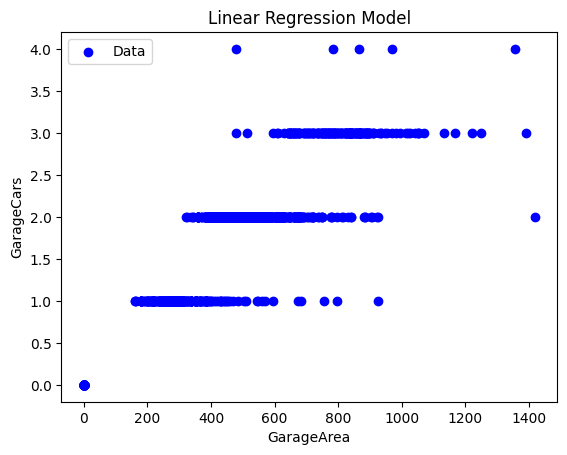

In [ ]:
plt.scatter(X['GarageArea'], y, color='blue', label='Data')


plt.xlabel('GarageArea')
plt.ylabel('GarageCars')
plt.title('Linear Regression Model')

plt.legend()

plt.show()

As demonstrated, the r^2-value for the GarageCars is 0.779, which implies that the GarageArea is significant in predicting the dependent variable. This information can be used further when building the regression model to predict the sale price of a house

In [ ]:
import pandas as pd

def limit(data, size=323):
    if len(data) > size:
        return data.sample(n=size).to_numpy()
    return data.to_numpy()

old = limit(df[(df['YearBuilt'] >= 1900) & (df['YearBuilt'] <= 1950)]['SalePrice'])
medium = limit(df[(df['YearBuilt'] > 1950) & (df['YearBuilt'] <= 2000)]['SalePrice'])
new = limit(df[(df['YearBuilt'] > 2000) & (df['YearBuilt'] <= 2020)]['SalePrice'])

# Now we have three arrays: old, medium, new
# Each array contains the sale prices for the specified year ranges

In [ ]:

data = pd.DataFrame({'Category': ['1'] * len(old) + ['2'] * len(medium) + ['3'] * len(new),
                     'Value': np.concatenate([old, medium, new])})
# Fit the ANOVA model
model = ols('Value ~ Category', data=data).fit()
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
# Print ANOVA table
print(anova_table)

                sum_sq     df           F        PR(>F)
Category  2.260775e+12    2.0  258.393443  1.296948e-90
Residual  4.225936e+12  966.0         NaN           NaN


In [ ]:
print("H0: The true average sale price among old, medium, and new houses are the same.")
print("Ha: At least one of the categories has a different true sale price.")

print("\n")
print("The test statistic is the F statistic = Mean Squared Between / Mean Squared Error.")
print("F = 258.183")

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(old, medium, new)

# Print results
print("F statistic:", f_statistic)
print("P-value:", p_value)

print("\n")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There are statistically significant differences in the sale prices between the categories, old, medium and new aged homes.")
else:
    print("Fail to reject null hypothesis. There are no statistically significant differences in the sale prices between the categories, old, medium, and new aged homes.")


H0: The true average sale price among old, medium, and new houses are the same.
Ha: At least one of the categories has a different true sale price.


The test statistic is the F statistic = Mean Squared Between / Mean Squared Error.
F = 258.183
F statistic: 258.39344272247314
P-value: 1.2969476696056167e-90


Reject null hypothesis. There are statistically significant differences in the sale prices between the categories, old, medium and new aged homes.


                sum_sq     df           F        PR(>F)
Category  2.260775e+12    2.0  258.393443  1.296948e-90
Residual  4.225936e+12  966.0         NaN           NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
     1      2  41346.5851   0.0   29129.716 53563.4543   True
     1      3 116677.4489   0.0 104460.5798 128894.318   True
     2      3  75330.8638   0.0  63113.9946 87547.7329   True
-------------------------------------------------------------


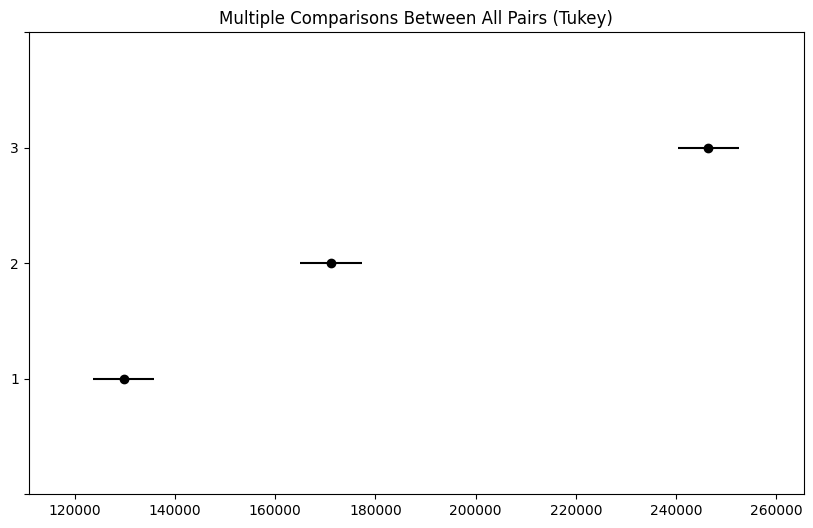

In [ ]:


model = ols('Value ~ Category', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

tukey = pairwise_tukeyhsd(endog=data['Value'], groups=data['Category'], alpha=0.05)

print(tukey)

import matplotlib.pyplot as plt
tukey.plot_simultaneous()
plt.show()

The Tukey test compares every pair of groups to determine whether their means are significantly different. In our case, Tukey's compared every pair in old, medium, essentially old vs. medium, old vs. new, and medium vs. new. The test reports the difference between the means of the groups being compared and is considered to be statistically significant if the confidence interval for that specific pair contains 0. For this specific test, the result was yes, there is a statistical difference between the average of the sale prices for the groups. The visual shows the true difference between the prices.

**General conclusions about the data:**
Ultimately, we can conclude that the data was initally very complex since it had a variety of features.
1. The first conclusion was that the data was mostly skewed to the left for the SalePrice as demonstrated in the plot above. We fixed this by applying the log transformation on the SalePrice.
2. The second conclusion was the primary features that were responsible for influencing the SalePrice, as demonstrated by the graph above.
3. We also found out features that are correlated to each other using a heat map. This also helped use reduce the dimensionality of the dataset.
4. Finally, we also performed ANOVA on the house saleprice and the year it was built (by categorizing it as new, medium, and old range.) We found out that the true average sale price for houses is different and then used Tukey's test to find out the differences between pairs of group means.


In [ ]:
df = label_encoded_df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'SalePrice']]
df


,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice
0,7,7.444833,548,6.753438,12.247699
1,6,7.141245,460,7.141245,12.109016
2,7,7.488294,608,6.825460,12.317171
3,7,7.448916,642,6.629363,11.849405
4,8,7.695758,836,7.044033,12.429220
...,...,...,...,...,...
1455,6,7.407318,460,6.860664,12.072547
1456,6,7.637234,500,7.341484,12.254868
1457,7,7.758333,252,7.050123,12.493133
1458,5,6.983790,240,6.983790,11.864469


#Primary Analysis
Based on the results of our exploration, we realized that a regression model would be the best ML technique to ues for this task because ultimately we are trying to predict the SalePrice for our houses. We will try to find the best model based on various regression technqiues such as random forest and linear regression.

Now, lets split the data in testing and training and perform machine learning with different models to see which one is the best

We begin by training it on a RandomForestModel, which is commonly used for this type of dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# We will use the original features (X) before polynomial transformation
# Perform K-Fold CV and calculate the mean squared error for each fold
rf_mse_scores = -cross_val_score(random_forest_model, X, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate the average RMSE across all folds
rf_rmse_scores = np.sqrt(rf_mse_scores)
rf_average_rmse = np.mean(rf_rmse_scores)

print(rf_average_rmse)


0.17856639324126128


The RMSE is a measure of the difference between the values predicted by a model and the actual values observed. A lower RMSE indicates that the model's predictions are closer to the actual data points, which means the model is performing more accurately. We found an average RMSE of 0.1785 across all folds which is very low. This tells us that the Random Forest model is very precise and will do a good job of predicting the final SalePrice variable based on the features we deemed important previously. Now we can proceed and actually run the model on the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'SalePrice' is the target variable
X = df.drop(columns=['SalePrice'])  # Features
y = df['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)
np.expm1(y_pred)

# Evaluate the model
mse_random = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_random)


Mean Squared Error: 0.03134384836721933


Visualizing the Random Forest results

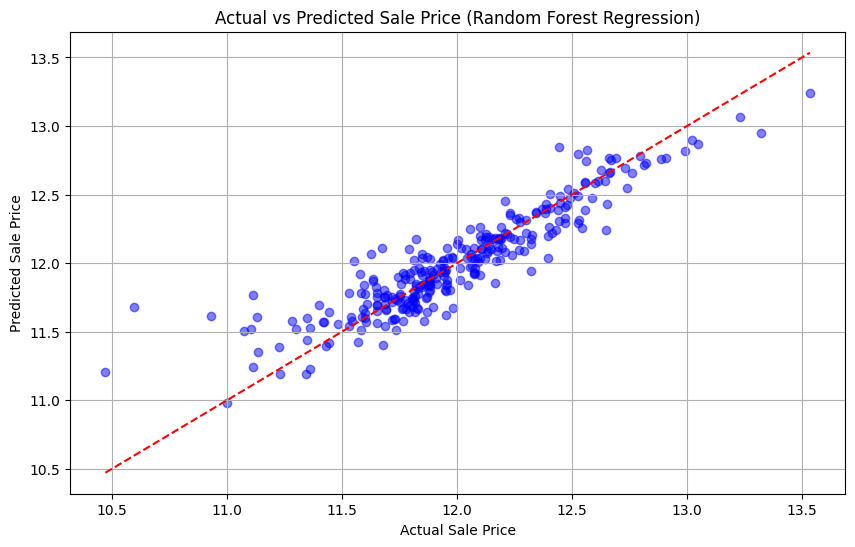

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Random Forest Regression)')
plt.grid(True)
plt.show()

Now, lets try Polynomial Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


# Define the number of folds for K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# We'll reuse the polynomial features from the earlier step (X_poly)
# Initialize the linear regression model
model = LinearRegression()

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Perform K-Fold CV and calculate the mean squared error for each fold
mse_scores = -cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate the average RMSE across all folds
rmse_scores = np.sqrt(mse_scores)
average_rmse = np.mean(rmse_scores)


print("The RMSE value is", average_rmse)

The RMSE value is 0.17844389700505608


Like before, we found an average RMSE of 0.1784 across all folds which is again, quite low. This tells us that the Polynomial Regression model is  precise and will do a good job of predicting the final SalePrice variable based on the features we deemed important previously. Now we can proceed and run the polynomial regression model on the training data and see if the predictions result in a low mean squared error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'SalePrice' is the target variable
X = df.drop(columns=['SalePrice'])  # Features
y = df['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the PolynomialFeatures transformer
poly_features = PolynomialFeatures(degree=2)  # Degree of the polynomial (adjust as needed)

# Transform the features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the polynomial features
linear_reg.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test_poly)
np.expm1(y_pred)


# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_poly)


Mean Squared Error: 0.03148014061995516


Visualizing the results for Linear Regression

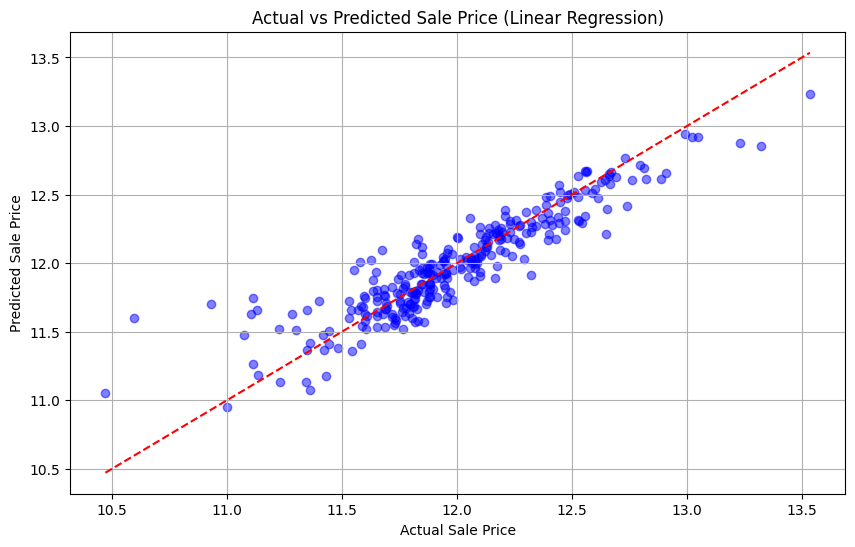

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Linear Regression)')
plt.grid(True)
plt.show()

Now, we'll compare both the models visually.

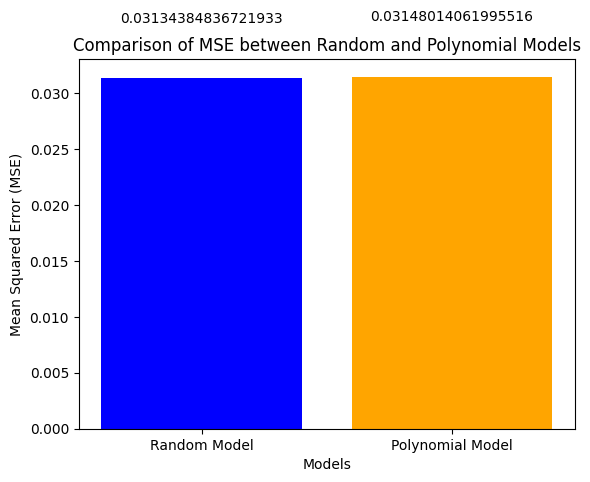

In [ ]:

labels = ['Random Model', 'Polynomial Model']

# Heights of bars
mse_values = [mse_random, mse_poly]

# Create bar graph
plt.bar(labels, mse_values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between Random and Polynomial Models')

# Add text annotations
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.005, str(v), ha='center')

# Show the plot
plt.show()


As demonstrated we can see that although both models are able to predict the price, Random Forest is slightly better due to the way its implemented. This can be because it uses various other models and this helps the model learn appropriately. For this dataset, it turned out to be a pretty close comparision between the two models, but if the number of relevant feature were more and the dataset was complicated, then Random Forest Model would definetly be better for similar datasets

#Conclusion
In conclusion, we started by getting a bunch of raw data. We cleaned the data and removed the Null values and filled the missing integer values so that we can perform our analysis on it.
Next, we tried to find relevant features and remove redunant features that were highly correalated with each other. This will help simplify the data for the ML model to be trained on.
Finally, we performed ML regression, specifically random forest and linear regression to find out which model was more accurate. Random forest algorithm forms various decisions trees and adds results from each resulting tree and makes a prediction. So, next time you have similar dataset (like predicting stock price, or housing price, or mortgage rates) consider using Random Forest Regression.

****